# SAT & ACT Analysis

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2017 Data Import and Cleaning

#### Read In SAT & ACT  Data


In [50]:
act_17 = pd.read_csv("../data/act_2017.csv")
act_18 = pd.read_csv("../data/act_2018.csv")
act_19 = pd.read_csv("../data/act_2019.csv")

In [51]:
sat_17 = pd.read_csv("../data/sat_2017.csv")
sat_18 = pd.read_csv("../data/sat_2018.csv")
sat_19 = pd.read_csv("../data/sat_2019.csv")

#### Preview and inspect the data


In [52]:
act_17.head(5)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [53]:
sat_17.head(5)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


#### 3. Look for errors in the data


In [54]:
sat_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   State                                51 non-null     object
 1   Participation                        51 non-null     object
 2    Evidence-Based Reading and Writing  51 non-null     int64 
 3    Math                                51 non-null     int64 
 4    Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


#### Analyse ACT 17 first

In [55]:
act_17['Participation'] = act_17['Participation'].str.rstrip('%').astype('float') 
# act_18['s_participation_18 '] = act_18['Participation'].str.rstrip('%').astype('float') 
# act_19['Participation'] = act_19['Participation'].str.rstrip('%').astype('float') 

sat_17['Participation'] = sat_17['Participation'].str.rstrip('%').astype('float') 
# sat_18['Participation'] = sat_18['Participation'].str.rstrip('%').astype('float') 
# sat_19['Participation'] = sat_19['Participation Rate'].str.rstrip('%').astype('float')

# act_2017 composite was a string due 

In [56]:
sat_17.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


#### Rename Columns

In [57]:
act_17 = act_17.rename(columns = {"State" : "state",
                        "Participation": "act_participation_17", 
                        "English": "act_english_17", 
                         "Math": "act_math_17",
                         "Reading": "act_reading_17",
                         "Science": "act_science_17",
                         "Composite":"act_composite_17"
                                                    })

In [58]:
sat_17 = sat_17.rename(columns = {"State" : "state",
                        "Participation": "sat_participation_17", 
                        "Evidence-Based Reading and Writing": "sat_ebrw_17", 
                         "Math": "sat_math_17",
                         "Math": "sat_math_17",
                         "Total": "sat_total_17",
                                                    })


#### Drop any unnecessary rows

In [59]:
#  National average is not relevant
act_17 = act_17.drop(index = 0)

#### Merge Dataframes

Join the 2017 ACT and SAT DataFrames using the _state_ in each DataFrame as the key.

In [60]:
combined_2017 = pd.merge(act_17, sat_17, left_on ='state', right_on='state')

#### Save cleaned, merged dataframe


In [61]:
combined_2017.to_csv('../data/combined_2017.csv',  index=False)

## 2018 & 2019 Data Import and Cleaning

In [62]:
# act_18['Participation'] = act_18['Participation'].str.rstrip('%').astype('float') 
act_19[' Participation'] = act_19[' Participation'].str.rstrip('%').astype('float') 

sat_18['Participation'] = sat_18['Participation'].str.rstrip('%').astype('float') 
sat_19['Participation'] = sat_19['Participation'].str.rstrip('%').astype('float')


In [63]:
act_18 = act_18.rename(columns = {"State" : "state",
                        "Participation": "act_participation_18", 
                         "Composite":"act_composite_18"
                                                    })


In [64]:
sat_18 = sat_18.rename(columns = {"State" : "state",
                        "Participation": "sat_participation_18", 
                        " Evidence-Based Reading and Writing": "sat_ebrw_18", 
                         " Math": "sat_math_18",
                         " Total": "sat_total_18",
                                                    })


In [65]:
act_19 = act_19.rename(columns = {"State" : "state",
                        " Participation": "act_participation_19", 
                         "Composite":"act_composite_19"
                                                    })



In [66]:
sat_19 = sat_19.rename(columns = {"State" : "state",
                        "Participation": "sat_participation_19", 
                        " Evidence-Based Reading and Writing": "sat_ebrw_19", 
                         " Math": "sat_math_19",
                         " Total": "sat_total_19",
                                                    })

In [67]:
combined_2018 = pd.merge(act_18, sat_18, left_on='state', right_on='state')

In [68]:
combined_2018.to_csv('../data/combined_2018.csv',  index=False)

In [69]:
combined_2019 = pd.merge(act_19, sat_19, left_on='state', right_on='state')

In [70]:
combined_2019.to_csv('../data/combined_2019.csv',  index=False)

## Combine 2017, 2018, and 2019 data into a single dataframe

In [71]:
combined_17_18 = pd.merge(combined_2017, combined_2018, left_on='state', right_on='state')

In [72]:
final = pd.merge(combined_17_18, combined_2019, left_on='state', right_on='state')

In [73]:
final.to_csv('../data/final.csv',  index=False)

# Exploratory Data Analysis

In [74]:
# final['sat_participation_17'] = final['sat_participation_17'].str.rstrip('%').astype('float') 
# final['act_participation_17'] = final['act_participation_17'].str.rstrip('%').astype('float') 
final['act_participation_18'] = final['act_participation_18'].str.rstrip('%').astype('float') 

## Visualize the data

In [75]:
correlation_2019 = final[['sat_total_19','sat_participation_19','act_composite_19','act_participation_19']]
# correlation_2019 = final['sat_total_19'], final['sat_participation_19'], final['act_composite_19'], final['act_participation_19']]

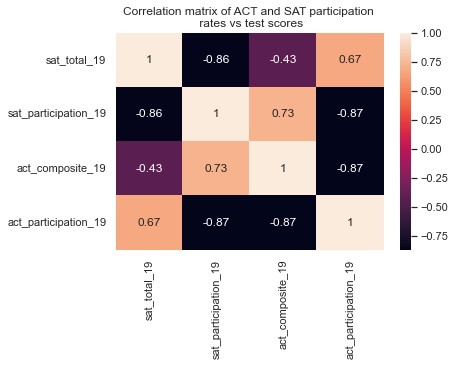

In [76]:
correlation_mat = correlation_2019.corr()
plt.title("Correlation matrix of ACT and SAT participation \n rates vs test scores")

sns.heatmap(correlation_mat, annot = True)

plt.show()

In [77]:
participation_2019 = final['sat_total_19'].corr(final['sat_participation_19'])
final['act_composite_19'].corr(final['act_participation_19'])

-0.8698651745309242

In [78]:
final['sat_participation_19'].min()

2.0

In [79]:
final.loc[final['state'] == 'Washington']

,state,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17,sat_participation_17,sat_ebrw_17,sat_math_17,...,sat_participation_18,sat_ebrw_18,sat_math_18,sat_total_18,act_participation_19,act_composite_19,sat_participation_19,sat_ebrw_19,sat_math_19,sat_total_19
47,Washington,29.0,20.9,21.9,22.1,22.0,21.9,64.0,541,534,...,69.0,543,538,1081,24.0,22.1,70.0,539,535,1074


In [80]:
final['act_participation_19'].mean()

58.15686274509804

In [81]:
final['sat_participation_19'].mean()

49.15686274509804

#### Participation Rates

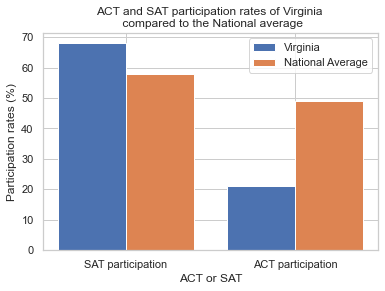

In [82]:
X = ['SAT participation','ACT participation']
Washington = [68, 21]
average = [58, 49]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Washington, 0.4, label = 'Virginia')
plt.bar(X_axis + 0.2, average, 0.4, label = 'National Average')
  
plt.xticks(X_axis, X)
plt.xlabel("ACT or SAT")
plt.ylabel("Participation rates (%)")
plt.title("ACT and SAT participation rates of Virginia \n compared to the National average")
plt.legend()
plt.savefig('Virginia1.png')
plt.show()

In [83]:
final.nsmallest(5, ['sat_total_19'])

,state,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17,sat_participation_17,sat_ebrw_17,sat_math_17,...,sat_participation_18,sat_ebrw_18,sat_math_18,sat_total_18,act_participation_19,act_composite_19,sat_participation_19,sat_ebrw_19,sat_math_19,sat_total_19
48,West Virginia,69.0,20.0,19.4,21.2,20.5,20.4,14.0,558,528,...,28.0,513,486,999,49.0,20.8,99.0,483,460,943
36,Oklahoma,100.0,18.5,18.8,20.1,19.6,19.4,7.0,530,517,...,8.0,541,521,1062,100.0,18.9,22.0,490,472,963
7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503,492,...,100.0,505,492,998,13.0,24.1,100.0,499,486,985
11,Idaho,38.0,21.9,21.8,23.0,22.1,22.3,93.0,513,493,...,100.0,508,493,1001,31.0,22.5,100.0,505,488,993
39,Rhode Island,21.0,24.0,23.3,24.7,23.4,24.0,71.0,539,524,...,97.0,513,505,1018,12.0,24.7,100.0,503,492,995


Suggests you take the test if you know you are going to do well 

#### Plot and interpret scatter plots for import columns


In [84]:
import seaborn as sns

In [85]:
seaborn_test = final[['sat_participation_19','sat_total_19']]

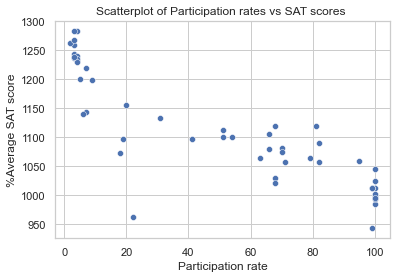

In [86]:
sns.set(style='whitegrid')
plt.xlabel("Participation rate")
plt.ylabel("%Average SAT score")
plt.title ("Scatterplot of Participation rates vs SAT scores ")
sns.scatterplot(x =final['sat_participation_19'], y = final['sat_total_19'],data=seaborn_test)
plt.savefig('ScatterACT.png')

In [87]:
final['sat_total_19'].corr(final['act_composite_19'])

-0.4258168852926788

#### Plot and interpret boxplots for important columns


## Outside Research

### Why are participation rates low 

#### 1) Cost of ACT and SAT 

ACT costs $67 dollars \
SAT cost $65 dollars \
Average  tutor is $45  to $100 per hour \
Strong postive correlation between family income and test results \

#### 2) Unprepared Students




### Conclusions and Recommendations

Based on your exploration of the data, what are your 1 or 2 key recommendations for the College Board?

Ensure that your recommendations make sense. These datasets have some limitations - think about granularity, aggregation, the relationships between populations size and rates. Consider the actual populations these data are drawn from. It is okay if your conclusions are tentative. You do not want to make unsupported jumps in logic.

#### 1) Make the SAT Mandatory 

#### 2) Make the SAT more affordable

#### 3) Make all students ready for the SAT 